La imagen se cargó correctamente y se convirtió en gris
Con Iluminación Coseno


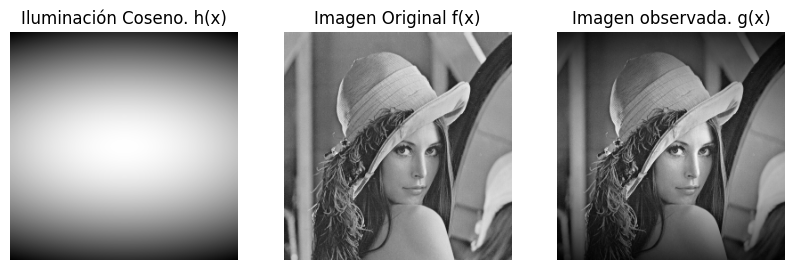

Con Iluminación Euclidiana


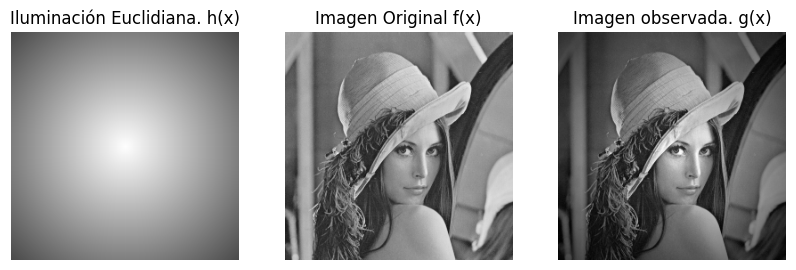

Con Iluminación Gradiente


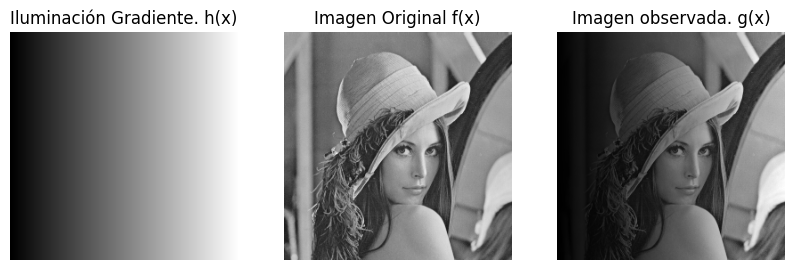

In [3]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt


def funcion_coseno(imagen,alpha,beta,x0,y0 ):
  altura, anchura = imagen.shape
  Iluminacion_coseno = np.ones(imagen.shape,dtype=None)
  for x in range(0,altura):
        for y in range(0,anchura):
                Cs =255*(np.cos(alpha * np.sqrt((x - x0)**2 + beta**2 * (y - y0)**2)))
                Iluminacion_coseno[x,y] = Cs

  return Iluminacion_coseno

def funcion_gradiente(imagen,M):
  altura, anchura = imagen.shape
  Iluminacion_gradiente = np.ones(imagen.shape,dtype=None)
  for x in range(0,altura):
        for y in range(0,anchura):
                G = (Iluminacion_gradiente[x,y]*float(y/M))*255
                if G > 255:
                    Iluminacion_gradiente[x,y] = 255
                else:
                    Iluminacion_gradiente[x,y] = G
  return Iluminacion_gradiente

def funcion_euclidiana(imagen, x0, y0):
  altura, anchura = imagen.shape
  Iluminacion_euclidiana = np.zeros(imagen.shape,dtype=None)
  for x in range(0,altura):
        for y in range(0,anchura):
            distancia = math.sqrt((x-x0)**2 + (y-y0)**2)
            if distancia > 255:
                Iluminacion_euclidiana[x,y] = 0
            else:
                Iluminacion_euclidiana[x,y] = 255-distancia
  return Iluminacion_euclidiana


ruta_imagen = 'lena256color.png'
imagen = cv2.imread(ruta_imagen)  #cargando la imagen

if imagen is not None:
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    print("La imagen se cargó correctamente y se convirtió en gris")
    alto, ancho = imagen_gris.shape

    #para imágenes de 256x256, es x0=128,y0=128
    xo=int(alto/2)
    yo=int(ancho/2)

    #funcion distancia_euclidiana
    Iluminacion_euclidiana = np.zeros(imagen_gris.shape,dtype=None)
    imagen_gris = imagen_gris.astype(np.float64)
    Iluminacion_euclidiana = funcion_euclidiana(imagen_gris, xo, yo)

    cv2.imwrite('Iluminacion_euclidiana.png', Iluminacion_euclidiana)

    imagen_observada = np.zeros(imagen_gris.shape,dtype=None)
    imagen_observada = cv2.multiply(imagen_gris,Iluminacion_euclidiana)
    resultado_degra_Euc = cv2.normalize(imagen_observada, None, 0, 255.0, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F)
    resultado_degra_Euc = resultado_degra_Euc.astype(np.uint8)


    cv2.imwrite('imagen_observada_Euc.png',resultado_degra_Euc)

    #unicamente para su despliegue en pantalla
    img_rgb_Euc = cv2.cvtColor(Iluminacion_euclidiana.astype(np.uint8), cv2.COLOR_BGR2RGB)
    img_rgb_degra_Euc = cv2.cvtColor(resultado_degra_Euc, cv2.COLOR_BGR2RGB)
    img_rgb_Imagen_Original = cv2.cvtColor(imagen_gris.astype(np.uint8), cv2.COLOR_BGR2RGB)


    cv2.imwrite('imagen_original.png', img_rgb_Imagen_Original)


    #gradiente
    M=256
    Iluminacion_gradiente = np.ones(imagen_gris.shape,dtype=None)
    imagen_gris = imagen_gris.astype(np.float64)
    Iluminacion_gradiente = funcion_gradiente(imagen_gris, M)
    cv2.imwrite('Iluminacion_gradiente.png', Iluminacion_gradiente)


    imagen_observada_gradiente = np.zeros(imagen_gris.shape,dtype=None)
    imagen_observada_gradiente = cv2.multiply(imagen_gris,Iluminacion_gradiente)

    resultado_degra_gra = cv2.normalize(imagen_observada_gradiente, None, 0, 255.0, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F)
    resultado_degra_gra = resultado_degra_gra.astype(np.uint8)

    cv2.imwrite('imagen_observada_gradiente.png', resultado_degra_gra)

    img_rgb_gra = cv2.cvtColor(Iluminacion_gradiente.astype(np.uint8), cv2.COLOR_BGR2RGB)
    img_rgb_degra_gra = cv2.cvtColor(resultado_degra_gra, cv2.COLOR_BGR2RGB)



    #coseno
    alfa=0.01
    beta=0.5
    Iluminacion_coseno = np.zeros(imagen_gris.shape,dtype=None)
    imagen_gris = imagen_gris.astype(np.float64)
    Iluminacion_coseno = funcion_coseno(imagen_gris, alfa,beta,xo, yo)

    imagen_observada_coseno = np.zeros(imagen_gris.shape,dtype=None)
    imagen_observada_coseno = cv2.multiply(imagen_gris,Iluminacion_coseno)

    Iluminacion_coseno = cv2.normalize( Iluminacion_coseno, None, 0, 255.0, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F)

    cv2.imwrite('Iluminacion_coseno.png', Iluminacion_coseno)

    resultado_degra_cos = cv2.normalize(imagen_observada_coseno, None, 0, 255.0, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F)
    resultado_degra_cos = resultado_degra_cos.astype(np.uint8)


    cv2.imwrite('imagen_observada_coseno.png', resultado_degra_cos)

    img_rgb_Coseno = cv2.cvtColor(Iluminacion_coseno.astype(np.uint8), cv2.COLOR_BGR2RGB)
    img_rgb_degra_Coseno = cv2.cvtColor(resultado_degra_cos, cv2.COLOR_BGR2RGB)


    print("Con Iluminación Coseno")
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb_Coseno)
    plt.title("Iluminación Coseno. h(x)")
    plt.axis("off")  # Ocultar los ejes


    plt.subplot(1, 3, 2)
    plt.imshow(img_rgb_Imagen_Original)
    plt.title("Imagen Original f(x)")
    plt.axis("off")  # Ocultar los ejes


    plt.subplot(1, 3, 3)
    plt.imshow(img_rgb_degra_Coseno)
    plt.title("Imagen observada. g(x)")
    plt.axis("off")  # Ocultar los ejes
    plt.show()


    #########

    print("Con Iluminación Euclidiana")

    plt.figure(figsize=(10, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb_Euc)
    plt.title("Iluminación Euclidiana. h(x)")
    plt.axis("off")  # Ocultar los ejes


    plt.subplot(1, 3, 2)
    plt.imshow(img_rgb_Imagen_Original)
    plt.title("Imagen Original f(x)")
    plt.axis("off")  # Ocultar los ejes


    plt.subplot(1, 3, 3)
    plt.imshow(img_rgb_degra_Euc)
    plt.title("Imagen observada. g(x)")
    plt.axis("off")  # Ocultar los ejes
    plt.show()



    print("Con Iluminación Gradiente")

    plt.figure(figsize=(10, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb_gra)
    plt.title("Iluminación Gradiente. h(x)")
    plt.axis("off")  # Ocultar los ejes


    plt.subplot(1, 3, 2)
    plt.imshow(img_rgb_Imagen_Original)
    plt.title("Imagen Original f(x)")
    plt.axis("off")  # Ocultar los ejes


    plt.subplot(1, 3, 3)
    plt.imshow(img_rgb_degra_gra)
    plt.title("Imagen observada. g(x)")
    plt.axis("off")  # Ocultar los ejes
    plt.show()


else:
    print(f"No se pudo cargar la imagen desde {ruta_imagen}")